In [7]:
from importlib import reload

import src.bloch_hamiltonian as blc
import src.disclination as disc
import src.plotting as disc_plt

import numpy as np
from numpy import pi

import scipy as sp
import cupy as cp

from tqdm import tqdm

import matplotlib.pyplot as plt

# Define Pauli and Gamma matrices for convenience
sigma_0 = np.array([[1, 0], [0, 1]], dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

gamma_1 = np.kron(sigma_x, sigma_z)
gamma_2 = np.kron(-sigma_y, sigma_0)
gamma_3 = np.kron(sigma_z, sigma_0)
gamma_4 = np.kron(sigma_x, sigma_x)
gamma_5 = np.kron(sigma_x, sigma_y)

norb = 4

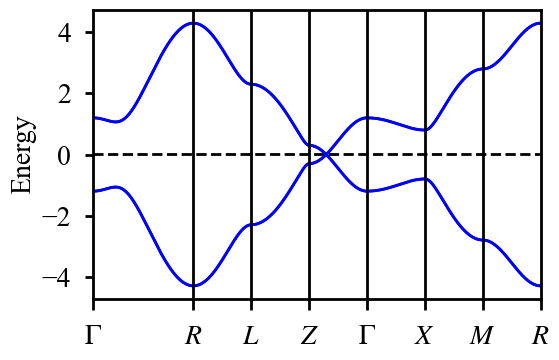

In [11]:
# Choose parameters and plot the band structure

nk = 50

k_ax = np.linspace(0, pi, nk + 1)[:-1]

m0 = 1.2
bxy = 1.0
bz = 0.75
g1 = 0.0
g2 = 0.0

c4_masses = (0.0, 0.0)

model_params = {'m0' : m0, 'bz' : bz, 'bxy' : bxy, 'g1' : g1, 'g2' : g2}

blc.plot_band_structure(0.01, m0, bxy, bz, g1, g2, c4_masses=c4_masses, save=False)

q = np.arccos(1 - m0 / bz)

delta = 2.0
phi = pi

In [9]:
e_min = -0.5
e_max = 0.5
e_pts = 100
energy_axis = np.linspace(e_min, e_max, e_pts)

eta = 0.005 * m0

In [16]:
reload(disc)

n_x = 11
n_kz = 50

ldos = disc.calculate_disc_ldos(energy_axis, eta, n_kz, n_x, model_params)

100%|██████████| 50/50 [00:38<00:00,  1.30it/s]


In [14]:
reload(blc)

nk = 50

dos = blc.calculate_dos(energy_axis, eta, nk, m0, bxy, bz, g1, g2, c4_masses=c4_masses)

100%|██████████| 100/100 [00:50<00:00,  1.98it/s]


Bulk DOS Fit: dos_params[0]=71.13174207484954, dos_params[1]=1.6373770492261375
Disclination Core DOS Fit: core_params[0]=29.24115625731108, core_params[1]=0.5531011161347863


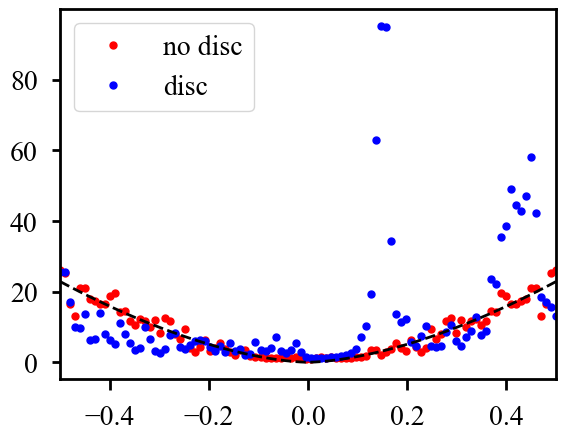

In [17]:
fitting = True

thresh = n_x // 2 - 2
core_ldos = disc.calculate_bound_ldos(n_x, thresh, ldos, exclude_core=False)

plt.plot(energy_axis, dos, 'ro', markersize=5, label='no disc')
plt.plot(energy_axis, core_ldos, 'bo', markersize=5, label='disc')

if fitting:
    def monoExp(x, a, b):
        return a * np.power(np.abs(x), b)

    dos_params, cv = sp.optimize.curve_fit(monoExp, energy_axis, dos, (200, 2))
    core_params, cv = sp.optimize.curve_fit(monoExp, energy_axis, core_ldos, (200, 2))

    print(f'Bulk DOS Fit: {dos_params[0]=}, {dos_params[1]=}')
    print(f'Disclination Core DOS Fit: {core_params[0]=}, {core_params[1]=}')

    plt.plot(energy_axis, monoExp(energy_axis, *dos_params), 'k--')
    # plt.plot(energy_axis, monoExp(energy_axis, *core_params), 'b--')

plt.legend()
plt.show()

Parameters: energy=-0.40, eta=0.006, nkz=50, nx=11
Model Parameters: {'m0': 1.2, 'bz': 0.75, 'bxy': 1.0, 'g1': 0.0, 'g2': 0.0}
Coefficient: 0.7048327646991335


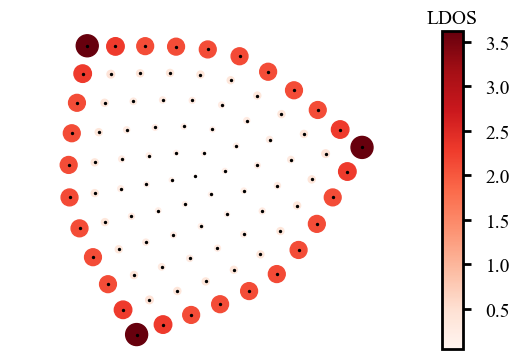

In [23]:
reload(disc_plt)
disc_plt.plot_disclination_ldos(-0.4)

In [22]:
def monoExp(x, m, t, b):
    return m * np.exp(t * np.abs(x)) + b

model_params, cv = sp.optimize.curve_fit(monoExp, energy_axis, core_ldos, (100, 1, 0))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [9]:
# Calculate DOS / area and LDOS around core / area, take their difference to subtract the E^2 bnackground, integrate peaks and hope it matches bound charge

In [10]:
# Calculate spectrum of a disclinated lattice and color the bands by density on the core or use inverse participation ratios